In [1]:
import matplotlib.pyplot as plt
from audio_processing import loudness, audio_import
import numpy as np
import os
import pyloudnorm as pyln

In [2]:
loader = audio_import.AudioLoader()

print(loader.directory)
#ensure files can be viewed
print(os.listdir(loader.directory))

data = loader.load_audio_file('ex1_distorted.wav')
print(data)

audio_data = data['data']
sr = data['samplerate']

..\audio_files
['Audio Recording on Wednesday afternoon.wav', 'ex1.wav', 'ex1_distorted.wav', 'ex2.wav', 'ex2_dist.wav', 'ex3.wav', 'ex4.wav', 'ex5.wav', 'ex5_distorted.wav', 'ex6.wav', 'ex6_distorted.wav', 'wav-example-file-download-1min.wav']
Loading: ..\audio_files\ex1_distorted.wav
{'data': array([-3.6675279e-05, -9.6962904e-06,  4.9517577e-05, ...,
        8.9322566e-06, -6.8958325e-06,  5.5372511e-06],
      shape=(161847,), dtype=float32), 'samplerate': 22050}
{'data': array([-3.6675279e-05, -9.6962904e-06,  4.9517577e-05, ...,
        8.9322566e-06, -6.8958325e-06,  5.5372511e-06],
      shape=(161847,), dtype=float32), 'samplerate': 22050}


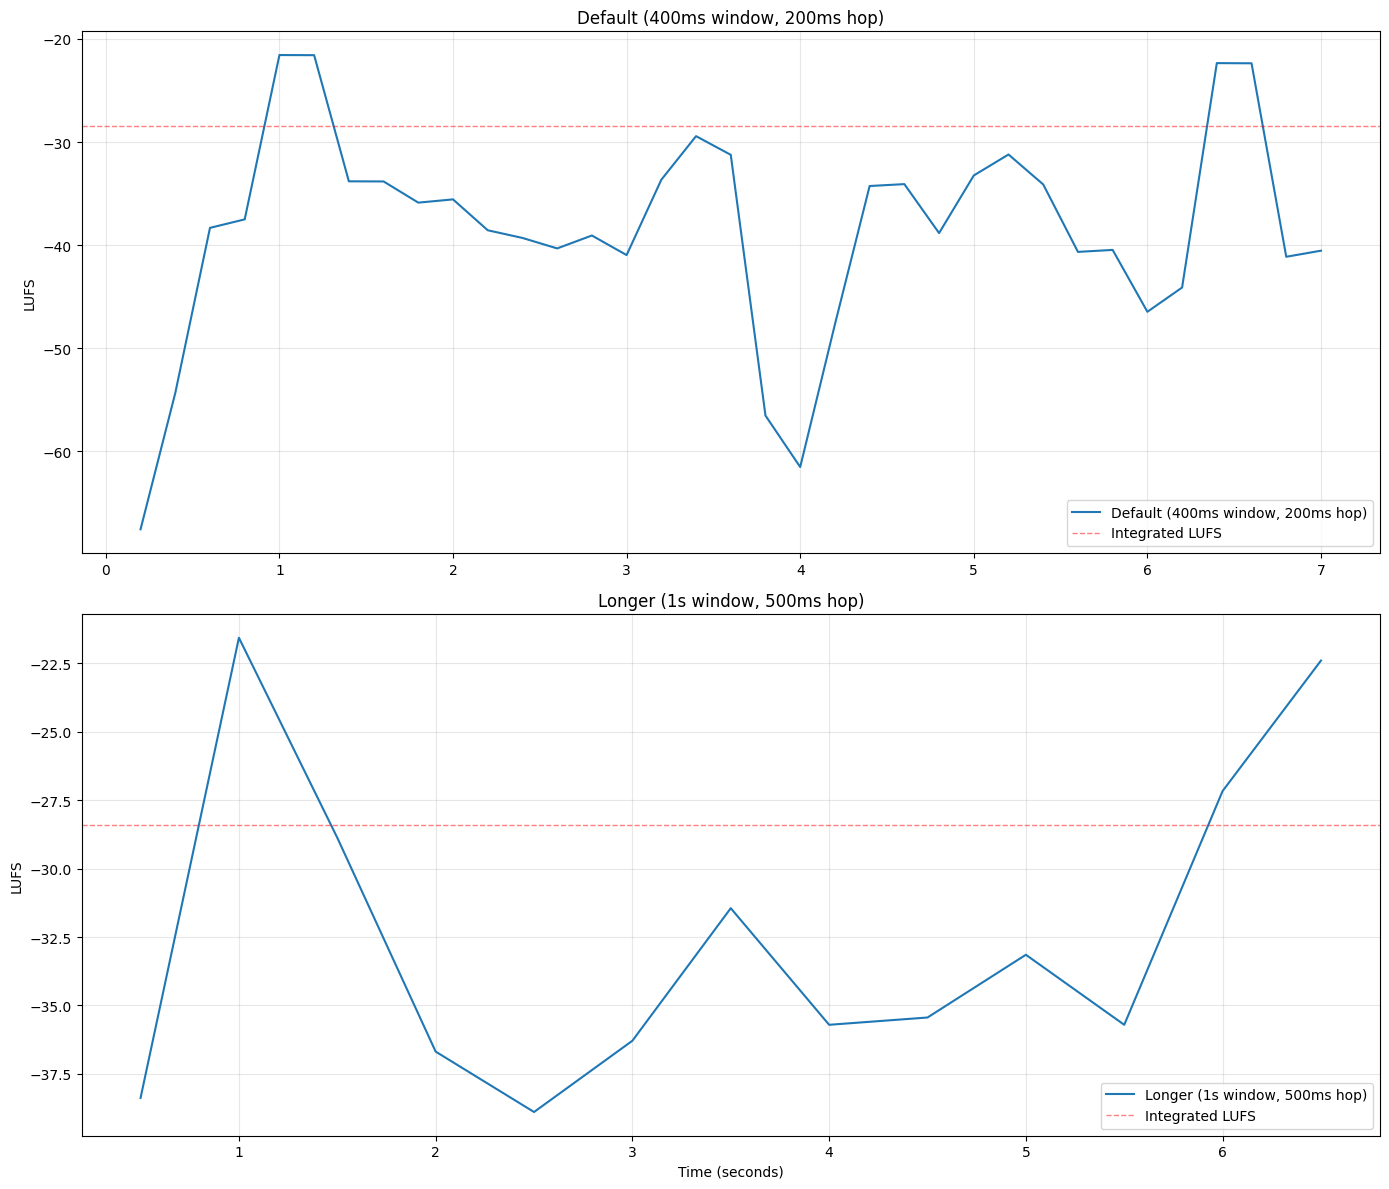


Comparison of window sizes:
Default (400ms window, 200ms hop):
  Measurements: 35
  Mean: -38.35 LUFS
  Range: 46.01 dB
Longer (1s window, 500ms hop):
  Measurements: 13
  Mean: -32.44 LUFS
  Range: 17.33 dB


In [4]:
# Test different window and hop sizes
test_configs = [
    (0.4, "Default (400ms window, 200ms hop)"),
    (1.0, "Longer (1s window, 500ms hop)"),
]

meter = pyln.Meter(sr)

fig, axes = plt.subplots(len(test_configs), 1, figsize=(14, 12))

for i, (window_s, label) in enumerate(test_configs):
    times_test, lufs_test = loudness.compute_short_term_loudness(audio_data, sr, window_s=window_s)
    
    axes[i].plot(times_test, lufs_test, linewidth=1.5, label=label)
    axes[i].axhline(meter.integrated_loudness(audio_data), color='red', linestyle='--', linewidth=1, alpha=0.5, label='Integrated LUFS')
    axes[i].set_ylabel('LUFS')
    axes[i].set_title(label)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)
    
axes[-1].set_xlabel('Time (seconds)')
plt.tight_layout()
plt.show()

print(f"\nComparison of window sizes:")
for window_s, label in test_configs:
    times_test, lufs_test = loudness.compute_short_term_loudness(
        audio_data, sr, window_s=window_s)
    print(f"{label}:")
    print(f"  Measurements: {len(times_test)}")
    print(f"  Mean: {np.mean(lufs_test):.2f} LUFS")
    print(f"  Range: {np.max(lufs_test) - np.min(lufs_test):.2f} dB")

Detected 2 spike regions:
  Region 1: 0.80s - 1.40s, max -21.56 LUFS
  Region 2: 6.20s - 6.80s, max -22.34 LUFS


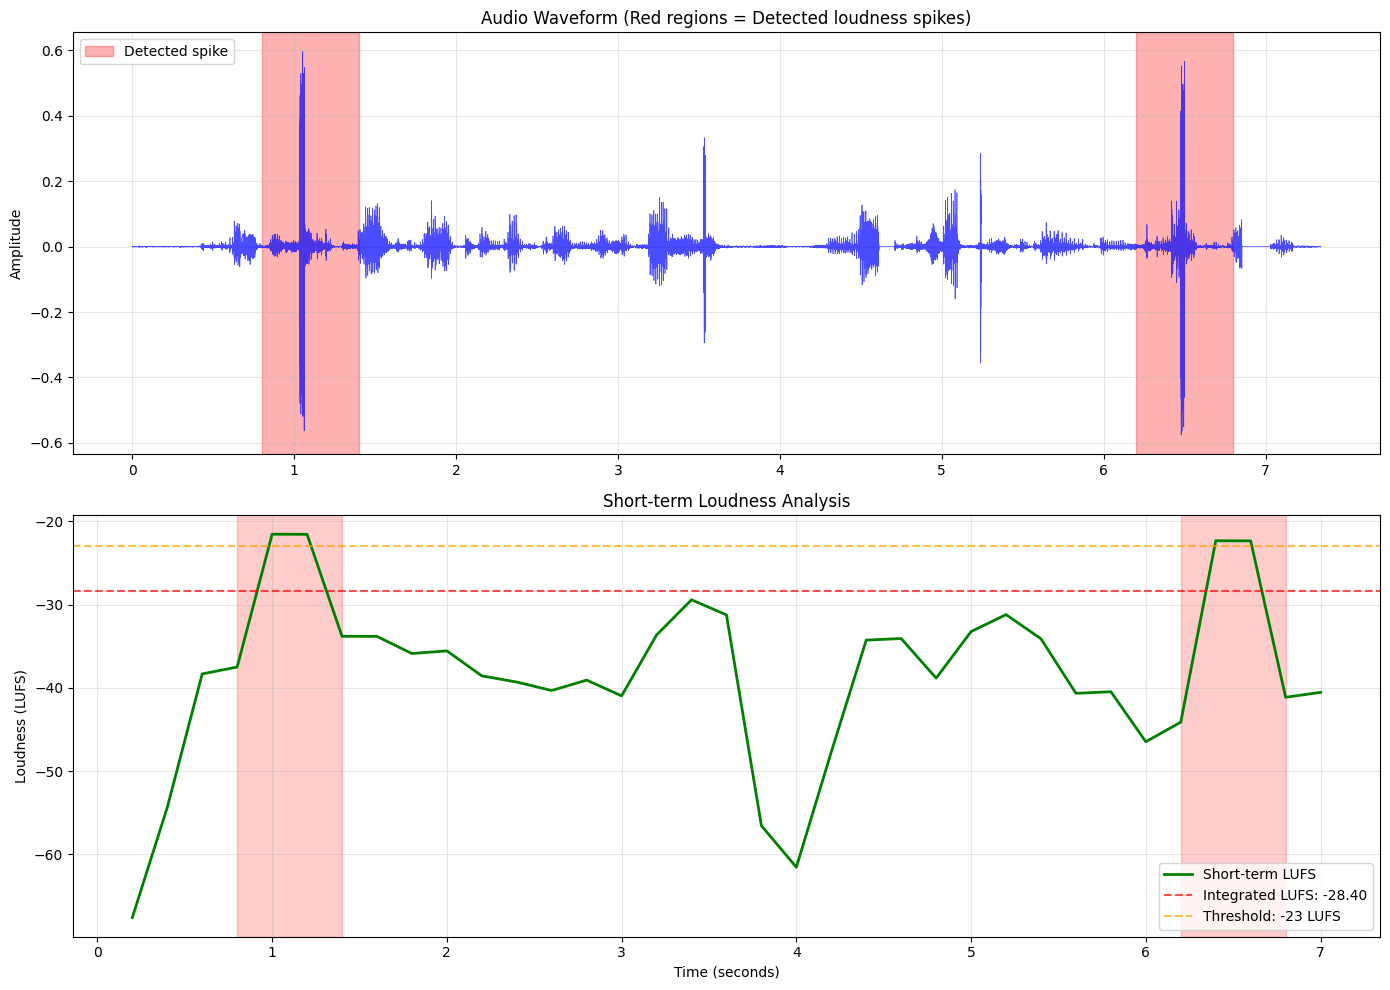

In [9]:
# Visualize short-term loudness over time
meter = pyln.Meter(sr)

times, lufs_values = loudness.compute_short_term_loudness(
    audio_data, 
    sr,
    window_s=0.4,
)

# Detect loudness spikes
spikes = loudness.get_loudness_spikes(
    audio_data, 
    sr,
    window_s=0.4,
    threshold=-23.0
)

print(f"Detected {len(spikes)} spike regions:")
for i, (start, end, max_lufs) in enumerate(spikes):
    print(f"  Region {i+1}: {start:.2f}s - {end:.2f}s, max {max_lufs:.2f} LUFS")

# Get integrated loudness
integrated_lufs = loudness.get_lufs(audio_data, sr)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Waveform with highlighted spike regions
time_waveform = np.arange(len(audio_data)) / sr
ax1.plot(time_waveform, audio_data, linewidth=0.5, alpha=0.7, color='blue')

# Highlight detected spike regions
for start, end, max_lufs in spikes:
    ax1.axvspan(start, end, alpha=0.3, color='red', label='Detected spike' if start == spikes[0][0] else '')

ax1.set_ylabel('Amplitude')
ax1.set_title('Audio Waveform (Red regions = Detected loudness spikes)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Short-term loudness
ax2.plot(times, lufs_values, linewidth=2, color='green', label='Short-term LUFS')

# Highlight spike regions on loudness plot too
for start, end, max_lufs in spikes:
    ax2.axvspan(start, end, alpha=0.2, color='red')

ax2.axhline(integrated_lufs, color='red', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Integrated LUFS: {integrated_lufs:.2f}')
ax2.axhline(-23, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label='Threshold: -23 LUFS')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Loudness (LUFS)')
ax2.set_title('Short-term Loudness Analysis')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Test compute_short_term_loudness function
times, lufs_values = loudness.compute_short_term_loudness(
    audio_data, 
    sr, 
    meter, 
    window_s=0.4,  # 400ms windows
    hop_s=0.2      # 200ms hop (50% overlap)
)

print(f"Short-term loudness analysis:")
print(f"  Number of measurements: {len(times)}")
print(f"  Time range: {times[0]:.2f}s to {times[-1]:.2f}s")
print(f"  Loudness range: {np.min(lufs_values):.2f} to {np.max(lufs_values):.2f} LUFS")
print(f"  Mean loudness: {np.mean(lufs_values):.2f} LUFS")
print(f"  Std deviation: {np.std(lufs_values):.2f} LUFS")

In [ ]:
# Test get_lufs function
meter = pyln.Meter(sr)
integrated_lufs = loudness.get_lufs(audio_data, sr, meter)

print(f"Integrated loudness: {integrated_lufs:.2f} LUFS")
print(f"\nReference levels:")
print(f"  Broadcast standard: -23 LUFS")
print(f"  Streaming (Spotify): -14 LUFS")
print(f"  YouTube: -13 to -15 LUFS")

In [ ]:
# Load audio file
loader = audio_import.AudioLoader()
print(f"Audio directory: {loader.directory}")
print(f"Available files: {os.listdir(loader.directory)}")

# Load a sample audio file
data = loader.load_audio_file('ex1_distorted.wav')
audio_data = data['data']
sr = data['samplerate']

print(f"\nAudio info:")
print(f"  Sample rate: {sr} Hz")
print(f"  Duration: {len(audio_data) / sr:.2f} seconds")
print(f"  Samples: {len(audio_data)}")

In [ ]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pyloudnorm as pyln
sys.path.append(os.path.abspath(os.path.join(".", "src")))

from audio_processing import audio_import
from audio_processing import loudness

AttributeError: module 'audio_processing.loudness' has no attribute 'get_loudness_spikes'

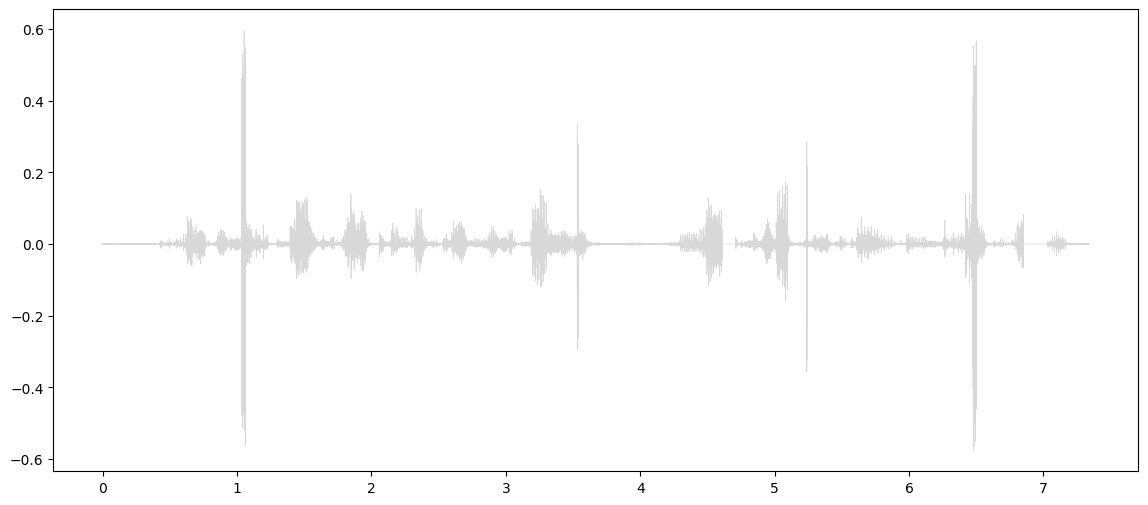

In [ ]:
# Test get_loudness_spikes with different thresholds
thresholds = [-20, -15, -10]
colors = ['orange', 'red', 'purple']

fig, ax = plt.subplots(figsize=(14, 6))

# Plot full waveform
time_waveform = np.arange(len(audio_data)) / sr
ax.plot(time_waveform, audio_data, linewidth=0.5, alpha=0.3, color='gray', label='Waveform')

# Test each threshold
for threshold, color in zip(thresholds, colors):
    spike_times, spike_lufs = loudness.get_loudness_spikes(
        audio_data, sr, 
        window_s=0.4, 
        hop_s=0.2, 
        threshold=threshold
    )
    
    print(f"\nThreshold: {threshold} LUFS")
    print(f"  Detected sections: {len(spike_times)}")
    if len(spike_times) > 0:
        print(f"  Times: {spike_times}")
        print(f"  Loudness values: {spike_lufs}")
        
        # Mark detected sections on waveform
        for t in spike_times:
            ax.axvline(t, color=color, alpha=0.6, linewidth=2, linestyle='--')

ax.set_xlabel('Time (seconds)')
ax.set_ylabel('Amplitude')
ax.set_title('Loudness Spike Detection (Vertical lines show detected sections)')
ax.legend([f'{t} LUFS threshold' for t in thresholds], loc='upper right')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Visualize loudness over time with spike detection
threshold = -15  # LUFS
spike_times, spike_lufs = loudness.get_loudness_spikes(
    audio_data, sr, 
    window_s=0.4, 
    hop_s=0.2, 
    threshold=threshold
)

# Get all loudness values for comparison
meter = pyln.Meter(sr)
all_times, all_lufs = loudness.compute_short_term_loudness(
    audio_data, sr, meter,
    window_s=0.4, 
    hop_s=0.2
)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: Waveform with spike markers
time_waveform = np.arange(len(audio_data)) / sr
ax1.plot(time_waveform, audio_data, linewidth=0.5, alpha=0.7, color='blue')
for t in spike_times:
    ax1.axvspan(t - 0.2, t + 0.2, alpha=0.3, color='red')
ax1.set_ylabel('Amplitude')
ax1.set_title('Audio Waveform (Red regions = Loudness spikes detected)')
ax1.grid(True, alpha=0.3)

# Plot 2: Loudness over time
ax2.plot(all_times, all_lufs, linewidth=1, alpha=0.5, color='gray', label='All sections')
ax2.scatter(spike_times, spike_lufs, color='red', s=50, zorder=5, label=f'Spikes (>{threshold} LUFS)')
ax2.axhline(threshold, color='orange', linestyle='--', linewidth=1.5, alpha=0.7, label=f'Threshold: {threshold} LUFS')
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Loudness (LUFS)')
ax2.set_title('Short-term Loudness with Spike Detection')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nSpike Detection Summary:")
print(f"  Threshold: {threshold} LUFS")
print(f"  Total sections analyzed: {len(all_times)}")
print(f"  Sections above threshold: {len(spike_times)}")
print(f"  Percentage: {100 * len(spike_times) / len(all_times):.1f}%")

In [ ]:
# Demonstrate adjacent section merging
print("Testing adjacent section merging:\n")

# Without merging - use compute_short_term_loudness and manually filter
meter = pyln.Meter(sr)
all_times, all_lufs = loudness.compute_short_term_loudness(
    audio_data, sr, meter, window_s=0.4, hop_s=0.2
)
threshold = -15

# Manual filter without merging
unmerged_times = all_times[all_lufs > threshold]
unmerged_lufs = all_lufs[all_lufs > threshold]

# With merging - use get_loudness_spikes
merged_times, merged_lufs = loudness.get_loudness_spikes(
    audio_data, sr, window_s=0.4, hop_s=0.2, threshold=threshold
)

print(f"Without merging: {len(unmerged_times)} detections")
print(f"With merging: {len(merged_times)} merged sections")
print(f"\nMerged sections reduced count by {len(unmerged_times) - len(merged_times)} ({100 * (len(unmerged_times) - len(merged_times)) / len(unmerged_times):.1f}%)")

# Visualize the difference
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Unmerged
ax1.plot(all_times, all_lufs, linewidth=1, alpha=0.3, color='gray')
ax1.scatter(unmerged_times, unmerged_lufs, color='orange', s=30, alpha=0.7, label='Unmerged detections')
ax1.axhline(threshold, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax1.set_ylabel('Loudness (LUFS)')
ax1.set_title(f'Without Merging: {len(unmerged_times)} detections')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Merged
ax2.plot(all_times, all_lufs, linewidth=1, alpha=0.3, color='gray')
ax2.scatter(merged_times, merged_lufs, color='red', s=80, marker='D', label='Merged sections', zorder=5)
ax2.axhline(threshold, color='red', linestyle='--', linewidth=1, alpha=0.5)
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Loudness (LUFS)')
ax2.set_title(f'With Merging: {len(merged_times)} merged sections')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()